In [1]:

import numpy as np 
import pandas as pd 

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,f1_score,precision_score,recall_score,roc_curve,roc_auc_score


In [4]:
df = pd.read_csv('diabetes.csv')

In [5]:
df_temp = df.copy()

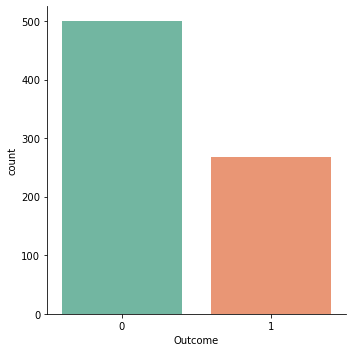

In [6]:
# The visualisation of outcome
sns.catplot(x="Outcome", kind="count", data=df_temp, palette="Set2")
##plt.show()

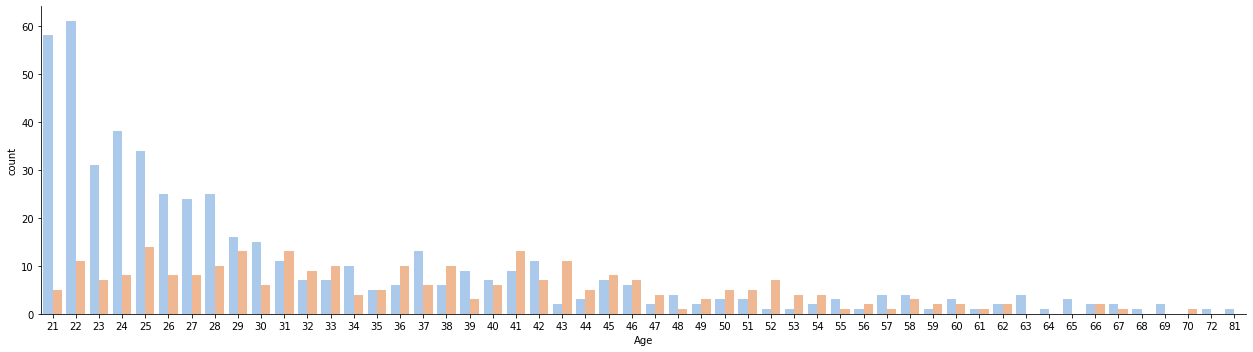

In [7]:
# The visualisation count of Age of their diabetics
ax = sns.catplot(x="Age", kind="count",hue="Outcome",data=df_temp, palette="pastel", legend=False)
ax.fig.set_figwidth(20)


In [8]:
x = df_temp.drop(['Outcome'], axis = 1)
y = df_temp.loc[:,"Outcome"].values

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 123)

In [10]:
lr = LogisticRegression(solver='liblinear', max_iter = 1000) #solve=liblinear kaggle için gerekli
lr.fit(x_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [11]:
lr.fit(x_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [12]:
x_pred = lr.predict(x_train)

In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, x_pred)

array([[312,  31],
       [ 90,  81]], dtype=int64)

In [14]:
score = accuracy_score(y_train, x_pred)
score

0.7645914396887159

In [15]:
y_pred = lr.predict(x_test)

In [16]:
confusion_matrix(y_pred,y_test)

array([[143,  39],
       [ 14,  58]], dtype=int64)

In [17]:
#test score 
score = accuracy_score(y_pred, y_test)
score

0.7913385826771654

In [18]:
#EVALUATION

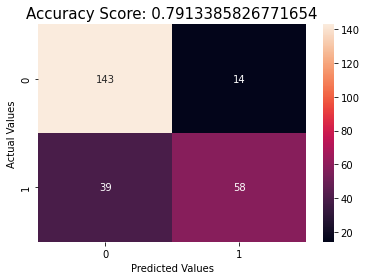

In [19]:
cm1 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.91      0.84       157
           1       0.81      0.60      0.69        97

    accuracy                           0.79       254
   macro avg       0.80      0.75      0.77       254
weighted avg       0.79      0.79      0.78       254



In [21]:
#TESTING MODEL

In [22]:
# Defined data set (it should be diabetic)
data = [[5, 150, 33.7, 50, 150, 74, 0.5, 53]]

# Create the pandas DataFrame 
df_test = pd.DataFrame(data, columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])

# Predict on new data
res = lr.predict(df_test)
res

array([1], dtype=int64)